### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [2]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from catboost import CatBoostRegressor

### Loading and Reading the Dataset

In [4]:
df = pd.read_csv('car data.csv')
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [5]:
# Looking at the dataset, we have lots of categories here. 
# The data needs to be explored carefully.

### Exploratory Data analysis (EDA)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.shape

(301, 9)

In [9]:
# This is a really small data. 

In [10]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

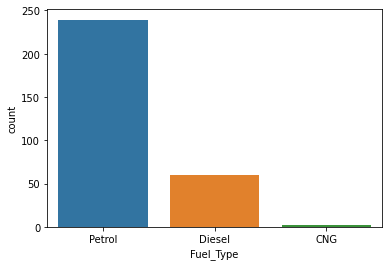

In [11]:
sns.countplot(x='Fuel_Type', data=df)

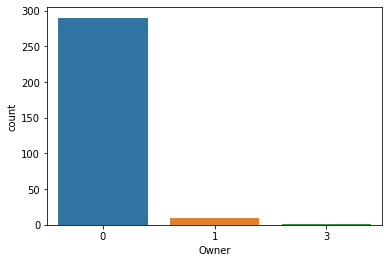

In [12]:
sns.countplot(x='Owner', data=df)

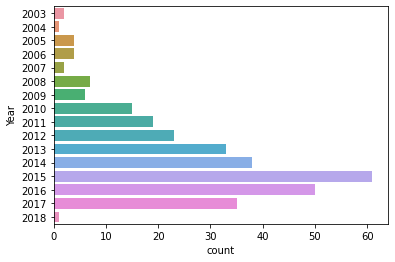

In [13]:
sns.countplot(y='Year', data=df)

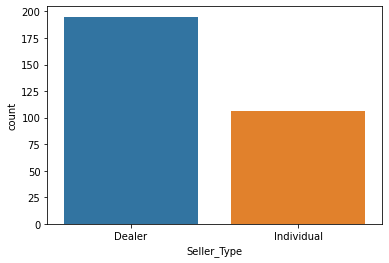

In [14]:
sns.countplot(x='Seller_Type', data=df)

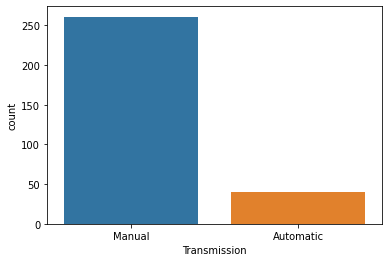

In [15]:
sns.countplot(x='Transmission', data=df)

Due to the fact that we have lesser data, there won't be much preprocessing as it ought to be.

#### Categorizing the data

In [16]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [17]:
df_1 = pd.get_dummies(df, prefix='', prefix_sep='', 
                            columns=['Owner', 'Seller_Type', 'Fuel_Type', 'Transmission', 'Year'])
df_1.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,0,1,3,Dealer,Individual,CNG,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,ritz,3.35,5.59,27000,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,sx4,4.75,9.54,43000,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,ciaz,7.25,9.85,6900,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,wagon r,2.85,4.15,5200,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,swift,4.60,6.87,42450,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [18]:
# We will be predicting the selling price

y = df_1.Selling_Price
df_2 = df_1.drop('Selling_Price', axis=1)

# Also we need to drop the car name since most of them have different names
df_2 = df_2.drop('Car_Name', axis=1)

### Modeling

In [19]:
# splitting to train and test set

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_2, test_size=0.2, random_state=42)
train_label, test_label = train_test_split(y, test_size=0.2, random_state=42)

In [20]:
# Catboosting

catboost = CatBoostRegressor()
catboost.fit(train_set, train_label)
score = catboost.score(test_set, test_label)
print(score)

Learning rate set to 0.032678
0:	learn: 5.0352964	total: 47.1ms	remaining: 47.1s
1:	learn: 4.9473935	total: 48.4ms	remaining: 24.2s
2:	learn: 4.8551795	total: 50.5ms	remaining: 16.8s
3:	learn: 4.7673765	total: 52.6ms	remaining: 13.1s
4:	learn: 4.6775173	total: 54.1ms	remaining: 10.8s
5:	learn: 4.6015350	total: 55.9ms	remaining: 9.26s
6:	learn: 4.5239608	total: 58.3ms	remaining: 8.27s
7:	learn: 4.4507103	total: 60.5ms	remaining: 7.5s
8:	learn: 4.3642796	total: 62.6ms	remaining: 6.89s
9:	learn: 4.2850759	total: 63.5ms	remaining: 6.29s
10:	learn: 4.2092058	total: 64.8ms	remaining: 5.82s
11:	learn: 4.1436149	total: 66ms	remaining: 5.43s
12:	learn: 4.0641610	total: 67.2ms	remaining: 5.1s
13:	learn: 3.9960457	total: 68.4ms	remaining: 4.82s
14:	learn: 3.9370638	total: 69.1ms	remaining: 4.54s
15:	learn: 3.8673781	total: 70.3ms	remaining: 4.32s
16:	learn: 3.8065632	total: 71.6ms	remaining: 4.14s
17:	learn: 3.7513722	total: 72.7ms	remaining: 3.97s
18:	learn: 3.6933451	total: 73.9ms	remaining: 3.

In [21]:
# This is a good result

In [22]:
# Linear Regressor

lin_reg = LinearRegression()
lin_reg.fit(train_set, train_label)
score = lin_reg.score(test_set, test_label)
print(score)

0.8493998040260821


In [23]:
# GradientBoosting

grad_boost = GradientBoostingRegressor()
grad_boost.fit(train_set, train_label)
score = grad_boost.score(test_set, test_label)
print(score)

0.9327848163368597


In [24]:
# RandomForest
rf = RandomForestRegressor()
rf.fit(train_set, train_label)
score = rf.score(test_set, test_label)
print(score)

0.9220248472791532


The best Model is CatBoostRegressor. It achieves 94% accuracy.
This model will perform better if there are more data and it's outliers were removed.